In [1]:
#Importing necessary modules
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Read csv file and create dataframe
df = pd.read_csv("Mobile_data.csv")
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [3]:
#Checking for missing values
df.isnull().sum() #-> No missing values

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [5]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [6]:
df[df["px_height"]==0]

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
1481,1834,2.1,7,40,0.1,99,4,11,0,1987,3692,13,0,16,3
1933,897,2.0,3,2,0.6,154,8,10,0,994,1958,7,5,7,1


In [7]:
#Dropping px_height rows with value zero
df.drop([1481,1933],inplace=True)
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


<AxesSubplot:>

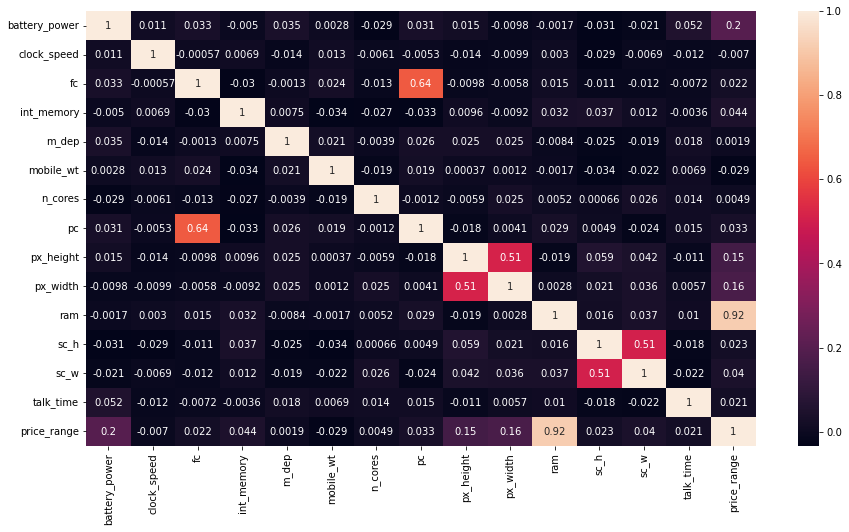

In [8]:
plt.figure(figsize = (15, 8))
sns.heatmap(data = df.corr(), annot = True)

In [9]:
#Dropping sc_w rows with values less than or equal to zero
df.drop(df[df.sc_w <= 0].index, inplace =True )
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [10]:
df['price_range'] = df.price_range.astype('category')

In [11]:
df.dtypes

battery_power       int64
clock_speed       float64
fc                  int64
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
price_range      category
dtype: object

In [12]:
df.groupby(["price_range"]).count()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
price_range,,,,,,,,,,,,,,
0,451,451,451,451,451,451,451,451,451,451,451,451,451,451
1,451,451,451,451,451,451,451,451,451,451,451,451,451,451
2,456,456,456,456,456,456,456,456,456,456,456,456,456,456
3,461,461,461,461,461,461,461,461,461,461,461,461,461,461


In [13]:
X = df.drop(labels= "price_range" , axis = 1)
y = df["price_range"]
# X.head()

### KNN Model

### Without Scaling

In [14]:
#Splitting into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [15]:
NNH = KNeighborsClassifier(n_neighbors= 45 ,metric='euclidean' )

In [16]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [17]:
NNH.score(X_train, y_train)

0.9190887666928516

In [18]:
NNH.score(X_test, y_test)

0.9157509157509157

### With Standard Scaler

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [20]:
from sklearn.preprocessing import StandardScaler
scalar1 = StandardScaler()
x1_train_scaler=scalar1.fit_transform(X_train)
x1_test_scaler=scalar1.fit_transform(X_test)

In [21]:
NNH = KNeighborsClassifier(n_neighbors= 45 ,metric='euclidean' )

In [22]:
NNH.fit(x1_train_scaler, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [23]:
NNH.score(x1_train_scaler, y_train)

0.7242733699921445

In [24]:
NNH.score(x1_test_scaler, y_test)

0.6538461538461539

### Robust Scaler

In [25]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=0)

In [27]:
NNH = KNeighborsClassifier(n_neighbors= 45 ,metric='euclidean' )

In [28]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [29]:
NNH.score(X_train, y_train)

0.7297721916732128

In [30]:
NNH.score(X_test, y_test)

0.6648351648351648

### MinMax Scaler

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [32]:
NNH = KNeighborsClassifier(n_neighbors= 45 ,metric='euclidean' )

In [33]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=45)

In [34]:
NNH.score(X_train, y_train)

0.7156323644933229

In [35]:
NNH.score(X_test, y_test)

0.6483516483516484

In [36]:
# No Scaling (Train Score) : 0.9190887666928516, k = 45
# No Scaling (Test Score) : 0.9157509157509157, k = 45

# Standard (Train Score) : 0.7242733699921445, k=45
# Standard (Test Score) : 0.6538461538461539, k=45

# Robust (Train Score) : 0.7297721916732128, k = 45
# Robust (Test Score) : 0.6648351648351648, k = 45


# MinMax (Train Score) : 0.7156323644933229, k = 45
# MinMax (Test Score) : 0.6483516483516484, k = 45
